# K - Nearest Neighbour Classification / Regression

Probably the **simplest supervised Machine Learning algorithm** is K-Nearest Neighbour (K-NN). K-NN can be applied for both, classification and regression. Compared to other ML algorithms, K-NN is special because it is a **non-parameteric ML algorithm**, which actually has no training phase. It is therefore also called a **Lazy Learner**. All other ML algorithms, which will be introduced in this lecture, have a learning-phase during which either a class-specific data-distribution or a class-boundary is learned. After this learning phase the entire knowledge from the training-data set is encoded in some parameters, which uniquely define the class-specific distribution or the class-boundary. Not so with K-NN! In K-NN the entire set of labeled training data is stored. In the inference phase new data is classified by just comparing the new instance with all training-instances and deciding for the class, which most often appears in the set of k nearest training instances. 

**K-NN Classifier:**
1. Training: Store the set of labeled training data $T=\lbrace \mathbf{x}_t,r_t) \rbrace_{t=1}^N$
2. Inference: 
    1. For a new input vector $\mathbf{x}$: Determine the set $M(\mathbf{x},T,K)$ of $K$ training instances from $T$, which  are closest to $\mathbf{x}$. 
    2. Assign the class $r$ to $\mathbf{x}$, which most often appears in $M(\mathbf{x},T,K)$.

The number of neighbours $K$ is a hyperparameter. If $K$ is small (e.g. 1 or 3), the classifier is not robust w.r.t. outliers and possibly overfitted to training data. The higher the value of $K$, the smoother the class boundary and the better the generalisation. However, a too high value may yield underfitting.

Another important hyperparameter is the distance-function, e.g. Euclidean-, Manhattan- or any other Minkowski-distance.

**K-NN Regression:**
1. Training: Store the set of labeled training data $T=\lbrace \mathbf{x}_t,r_t) \rbrace_{t=1}^N$
2. Inference: 
    1. For a new input vector $\mathbf{x}$: Determine the set $M(\mathbf{x},T,K)$ of $K$ training instances from $T$, which  are closest to $\mathbf{x}$. 
    2. Assign the value $r$ to $\mathbf{x}$ by interpolating over the values in $M(\mathbf{x},T,K)$.
    
For K-NN regression an additional hyperparameter is the interpolation method used to calculate the new value $r$. The simplest method is to just take the arithmetic mean over the values in the neighborhood.

**K-NN Pros and Cons:**

The drawbacks of K-NN are 
* the large memory footprint, since all training data must be kept
* long inference time, since each new instance must be compared to all training instances in order to determine the nearest neighbours

For $K=1$ the bias is close to 0, but the variance is quite high. With increasing $K$ bias increases but variance decreases.   

## K-NN Classification Demo

In the reminder of this section the application of a K-NN classifier is demonstrated.

### Generate set of labeled training data

In this demo we do not apply a real-world training data set. Instead we generate Gaussian-distributed 2-dimensional training vectors $\mathbf{x}=(x_1,x_2)$ for each of the 2 classes. The distributions of the 2 classes differ in their mean-vector and their covariance matrix. The code cells below implement the generation and visualisation of labeled data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=2)
from matplotlib.colors import ListedColormap
import seaborn as sns

**Generate Gaussian-distributed 2-dimensional data for class 0:**

In [2]:
np.random.seed(1234)

In [3]:
Numpoints=200
m1=1    #Mean of first dimension
m2=2    #Mean of second dimension
mean=np.array(([m1,m2]))
s11=1.7 #standard deviation of x1
s22=1.4 #standard deviation of x2 
rho=0.8 #correlation coefficient between s11 and s22
#Determine covariance matrix from standard deviations
var11=s11**2
var22=s22**2
var12=rho*s11*s22
var21=var12
cov=np.array(([var11,var12],[var21,var22]))
print("Configured mean: ")
print(mean)
print("Configured covariance: ")
print(cov)
pointset0=np.random.multivariate_normal(mean,cov,Numpoints,)
print("First samples of pointset:")
print(pointset0[:20,:])

Configured mean: 
[1 2]
Configured covariance: 
[[2.89 1.9 ]
 [1.9  1.96]]
First samples of pointset:
[[ 0.73  0.75]
 [-1.23 -0.02]
 [ 1.81  3.41]
 [-0.15  0.55]
 [ 1.92  0.78]
 [-1.31  1.04]
 [ 0.28 -0.32]
 [ 1.55  2.43]
 [ 0.21  1.63]
 [-0.52 -0.54]
 [ 1.61  1.91]
 [ 0.45  2.05]
 [-0.97  0.04]
 [ 0.65  0.15]
 [ 0.86  2.8 ]
 [ 1.51  2.7 ]
 [-1.17  1.21]
 [-0.37  0.82]
 [ 0.93  1.67]
 [-1.39  2.19]]


**Generate Gaussian-distributed 2-dimensional data for class 1:**

In [4]:
Numpoints=200
m1=-2    #Mean of first dimension
m2=3   #Mean of second dimension
mean=np.array(([m1,m2]))
s11=0.8 #standard deviation of x1
s22=0.4 #standard deviation of x2 
rho=0.1 #correlation coefficient between s11 and s22
#Determine covariance matrix from standard deviations
var11=s11**2
var22=s22**2
var12=rho*s11*s22
var21=var12
cov=np.array(([var11,var12],[var21,var22]))
print("Configured mean: ")
print(mean)
print("Configured covariance: ")
print(cov)
pointset1=np.random.multivariate_normal(mean,cov,Numpoints)
print("First samples of pointset:")
print(pointset1[:20,:])

Configured mean: 
[-2  3]
Configured covariance: 
[[0.64 0.03]
 [0.03 0.16]]
First samples of pointset:
[[-1.79  2.65]
 [-2.25  2.48]
 [-1.83  2.83]
 [-2.83  3.5 ]
 [-2.88  3.12]
 [-1.26  3.54]
 [-2.39  2.72]
 [-1.43  2.94]
 [-2.48  3.11]
 [-0.52  2.74]
 [-1.4   3.  ]
 [-2.23  3.08]
 [-1.78  2.89]
 [-2.36  2.95]
 [-1.63  3.16]
 [-1.17  2.93]
 [-3.09  2.43]
 [-0.79  3.7 ]
 [-1.52  2.96]
 [-3.32  2.7 ]]


**Assign class labels and vertically stack class 0 and class 1 data.** The array of all input vectors is $X$ and the vector of all labels is $y$. The class-index of the $i.th$ row in $X$ is the value of the $i.th$ component in $y$:

In [5]:
X=np.vstack([pointset0,pointset1])
y=np.transpose(np.hstack([np.zeros(Numpoints),np.ones(Numpoints)]))

**Visualize all labeled data.** Data of class 0 has blue, data of class 1 red markers.

In [6]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['cornflowerblue','orange'])
cmap_bold = ['darkblue','red']

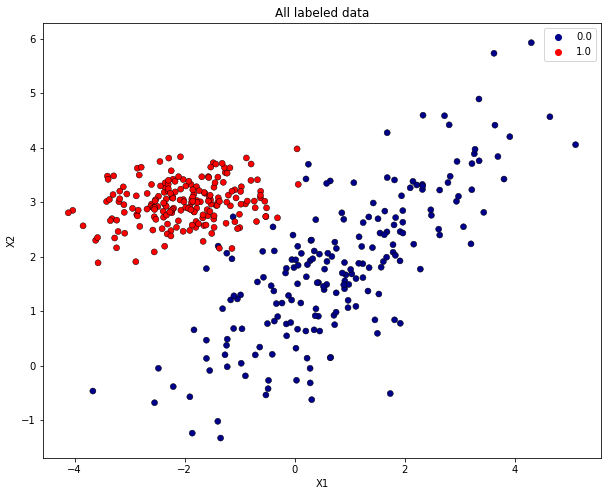

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=y,palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.title("All labeled data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### Split labeled data in training- and test-partition
The scikit-learn function `train_test_split()` shuffles the set of all labeled data and returns two partions of input vectors, `X_train` and `X_test` and the corresponding class-labels `y_train` and `y_test`. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [9]:
X.shape

(400, 2)

In [10]:
y.shape

(400,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=412)

**Visualize training data:** The plot below contains only those input-vectors from $X$, which has been assigned to the training-partition $X$.

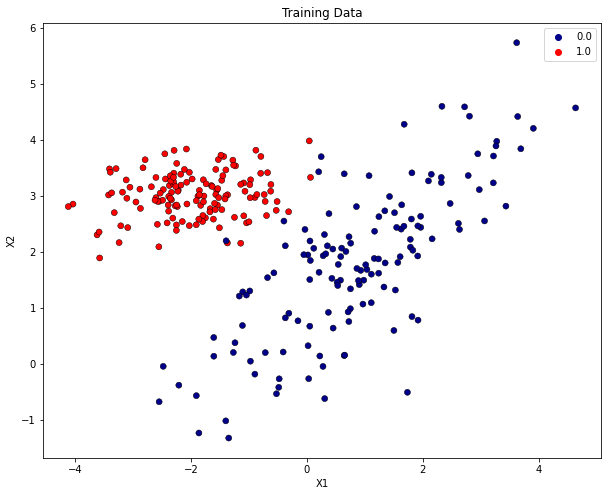

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1],hue=y_train,palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.title("Training Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### Train the K-NN classifier
All machine learning algorithms implemented in *scikit-learn* provide a `.fit(X_train, y_train)`-method, in which the training phase, i.e. the fitting of a model to the given training-data, is implemented. As already described above, in the case of the K-NN algorithm, there is no training-phase. Here, `fit()` just saves the given training data accordingly. The model is the set of training data itself. In this example the chosen number of neighbors is $K=3$.

In [13]:
K=3
clf = neighbors.KNeighborsClassifier(K)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**After training the resulting class boundary is plotted.** The plot also contains the **test-data**.
For plotting the decision boundary a class-specific color will be assigned to each point in the mesh $[x_{min}, x_{max}] \times [y_{min}, y_{max}]$.

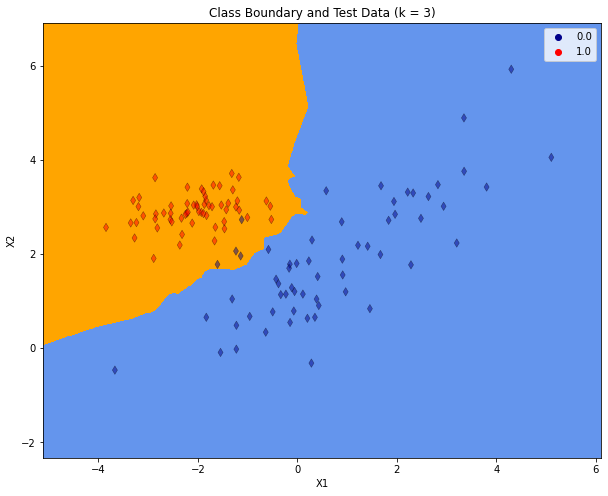

In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the test points
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1],hue=y_test,palette=cmap_bold,marker="d",alpha=0.5,edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class Boundary and Test Data (k = %i)"% (K))
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### Evaluate the classifier on Test-data

In [15]:
y_pred=clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [18]:
confusion_matrix(y_test,y_pred)

array([[56,  4],
       [ 0, 60]])

As can be seen in the confusion matrix, all class-1 data has been classified correctly. But there are 4 out of 60 class-0 instances, which are assigned to the wrong class. In the visualisation above, these errors are the blue markers in the orange region. 

### Repeat Training and Evaluation for $K=9$ neighbors

In [19]:
K=7
clf = neighbors.KNeighborsClassifier(K)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

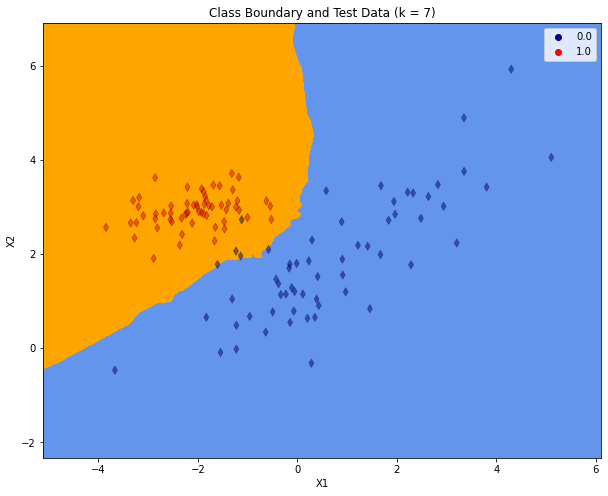

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the test points
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1],hue=y_test,palette=cmap_bold,marker="d",alpha=0.5,edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class Boundary and Test Data (k = %i)"% (K))
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [21]:
y_pred=clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [23]:
confusion_matrix(y_test,y_pred)

array([[56,  4],
       [ 0, 60]])

As the plot above shows, for the increased $K$ the class-boundary becomes smoother. But there are still 4 misclassified instances in the test-partition.